In [13]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import joblib
import json

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

In [14]:
file_path = "../data/processed/adult_with_clusters.data"
df = pd.read_csv(file_path)
df.head()

,age,education-num,hours-per-week,capital-gain,capital-loss,workclass_Local-gov,workclass_Never-worked,workclass_Non-specific,workclass_Private,workclass_Self-emp-inc,...,occupation_Transport-moving,relationship_Other-relative,relationship_Own-child,relationship_Spouse,race_Other,race_White,sex_Male,native-country_United-States,income,cluster
0,39.0,13.0,40.0,2.843612,-0.221333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0
1,50.0,13.0,13.0,-0.298014,-0.221333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,1
2,38.0,9.0,40.0,-0.298014,-0.221333,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0
3,53.0,7.0,40.0,-0.298014,-0.221333,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0,3
4,28.0,13.0,40.0,-0.298014,-0.221333,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,2


In [15]:
X = df.drop(columns=["income", "cluster"])
y = df["income"]
clusters = df["cluster"].unique()

In [16]:
models_and_params = {
    "RandomForest": (
        RandomForestClassifier(random_state=21562, n_jobs=-1),
        {
            "n_estimators": [200, 500],
            "max_depth": [None, 20],             # shallow vs deep
            "max_features": ["sqrt", "log2"],
            "min_samples_split": [2, 10],        # regularization
        }
    ),

    "XGBoost": (
        xgb.XGBClassifier(
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=21562,
            tree_method="hist",
            n_jobs=-1
        ),
        {
            "n_estimators": [200, 500],
            "max_depth": [3, 6],
            "learning_rate": [0.1, 0.05],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8, 1.0],
        }
    ),

    "SVM": (
        SVC(probability=True, random_state=21562),
        {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    )
}


In [17]:
import seaborn as sns

def plot_confusion_matrix(cm, title, labels=['<=50K', '>50K']):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()


confusion_matrix_total = np.zeros((2, 2), dtype=int)

Cluster 0
Running GridSearch for RandomForest...
RandomForest best params: {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 500}
RandomForest accuracy: 0.8214
----------------------------------------
Running GridSearch for XGBoost...


D:\UVG\NLP\text-normalization\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [00:35:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
XGBoost accuracy: 0.8325
----------------------------------------
Running GridSearch for SVM...
SVM best params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
SVM accuracy: 0.8048
----------------------------------------

Best model for this cluster:
Model: XGBoost
Accuracy: 0.8325
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1936
           1       0.78      0.68      0.73       953

    accuracy                           0.83      2889
   macro avg       0.82      0.79      0.80      2889
weighted avg       0.83      0.83      0.83      2889

Confusion Matrix:
[[1753  183]
 [ 301  652]]




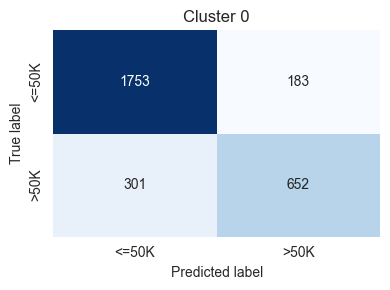

Computing SHAP values for XGBoost...


 97%|=================== | 2809/2889 [00:12<00:00]       

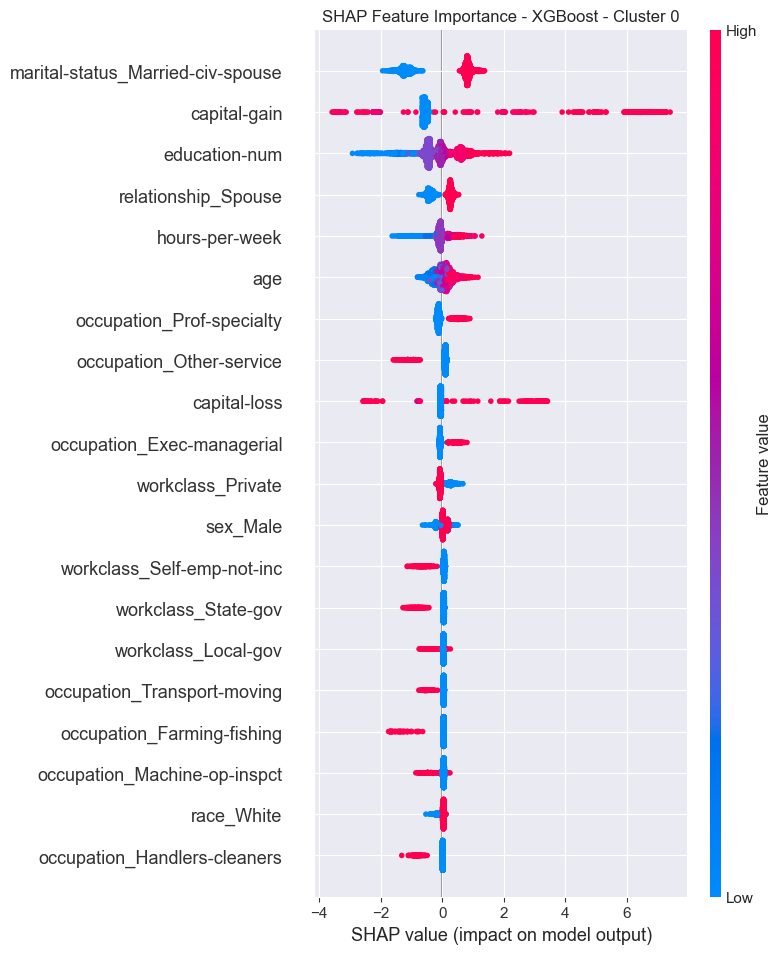

Cluster 1
Running GridSearch for RandomForest...
RandomForest best params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 500}
RandomForest accuracy: 0.8947
----------------------------------------
Running GridSearch for XGBoost...


D:\UVG\NLP\text-normalization\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [00:42:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost best params: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
XGBoost accuracy: 0.8995
----------------------------------------
Running GridSearch for SVM...
SVM best params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
SVM accuracy: 0.8684
----------------------------------------

Best model for this cluster:
Model: XGBoost
Accuracy: 0.8995
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       363
           1       0.81      0.31      0.45        55

    accuracy                           0.90       418
   macro avg       0.86      0.65      0.70       418
weighted avg       0.89      0.90      0.88       418

Confusion Matrix:
[[359   4]
 [ 38  17]]




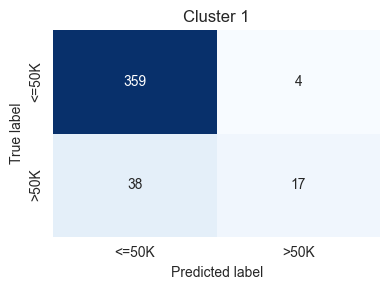

Computing SHAP values for XGBoost...


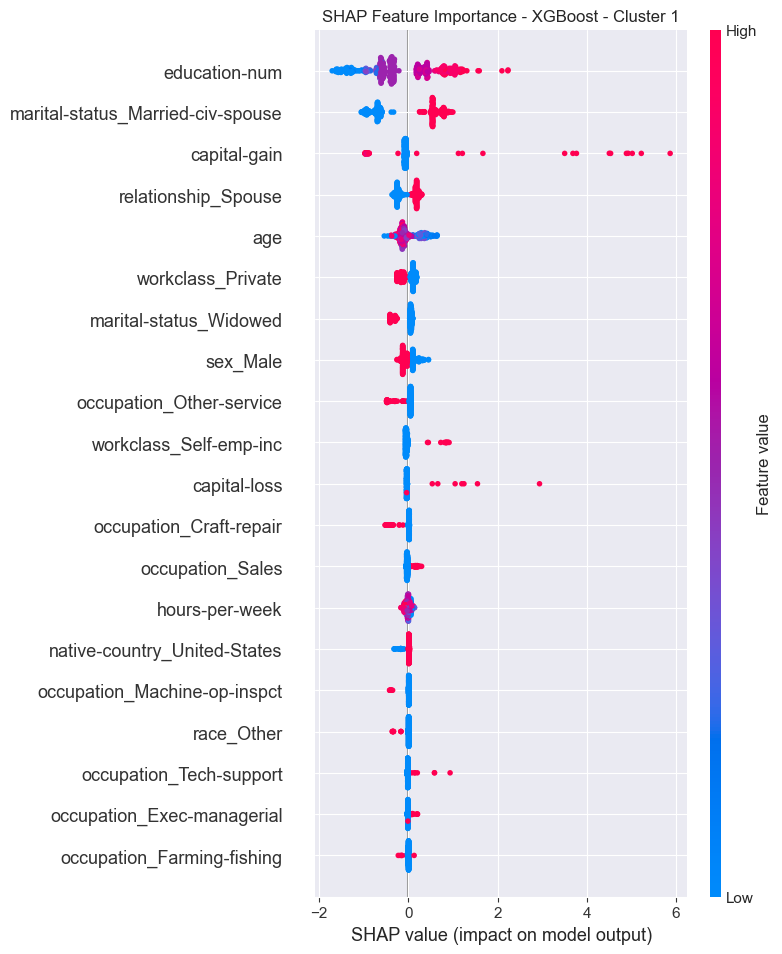

Cluster 3
Running GridSearch for RandomForest...
RandomForest best params: {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 200}
RandomForest accuracy: 0.8124
----------------------------------------
Running GridSearch for XGBoost...


D:\UVG\NLP\text-normalization\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [00:43:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost best params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
XGBoost accuracy: 0.8210
----------------------------------------
Running GridSearch for SVM...
SVM best params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
SVM accuracy: 0.7998
----------------------------------------

Best model for this cluster:
Model: XGBoost
Accuracy: 0.8210
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1118
           1       0.80      0.66      0.73       625

    accuracy                           0.82      1743
   macro avg       0.82      0.79      0.80      1743
weighted avg       0.82      0.82      0.82      1743

Confusion Matrix:
[[1016  102]
 [ 210  415]]




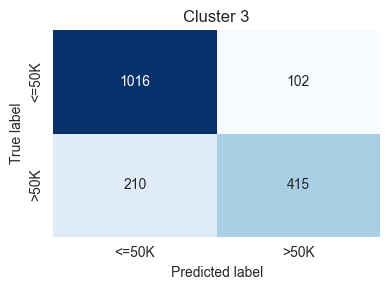

Computing SHAP values for XGBoost...


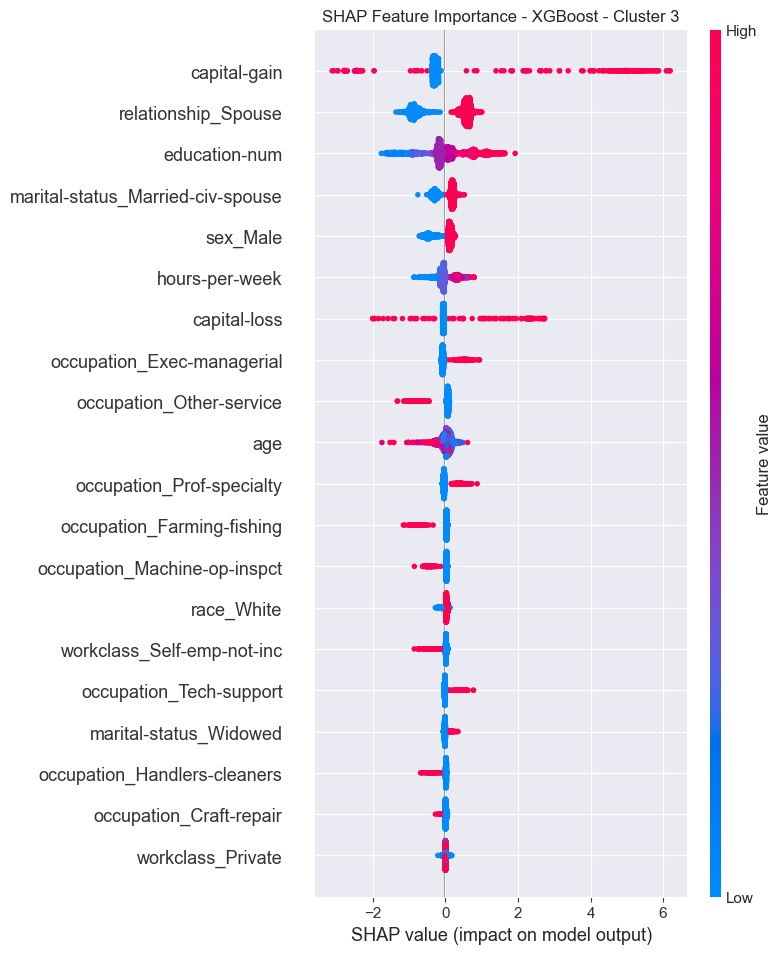

Cluster 2
Running GridSearch for RandomForest...
RandomForest best params: {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 500}
RandomForest accuracy: 0.9188
----------------------------------------
Running GridSearch for XGBoost...


D:\UVG\NLP\text-normalization\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [00:46:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost best params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
XGBoost accuracy: 0.9248
----------------------------------------
Running GridSearch for SVM...
SVM best params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
SVM accuracy: 0.9074
----------------------------------------

Best model for this cluster:
Model: XGBoost
Accuracy: 0.9248
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2524
           1       0.75      0.42      0.54       295

    accuracy                           0.92      2819
   macro avg       0.84      0.70      0.75      2819
weighted avg       0.92      0.92      0.91      2819

Confusion Matrix:
[[2484   40]
 [ 172  123]]




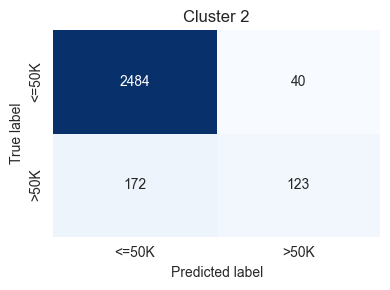

Computing SHAP values for XGBoost...


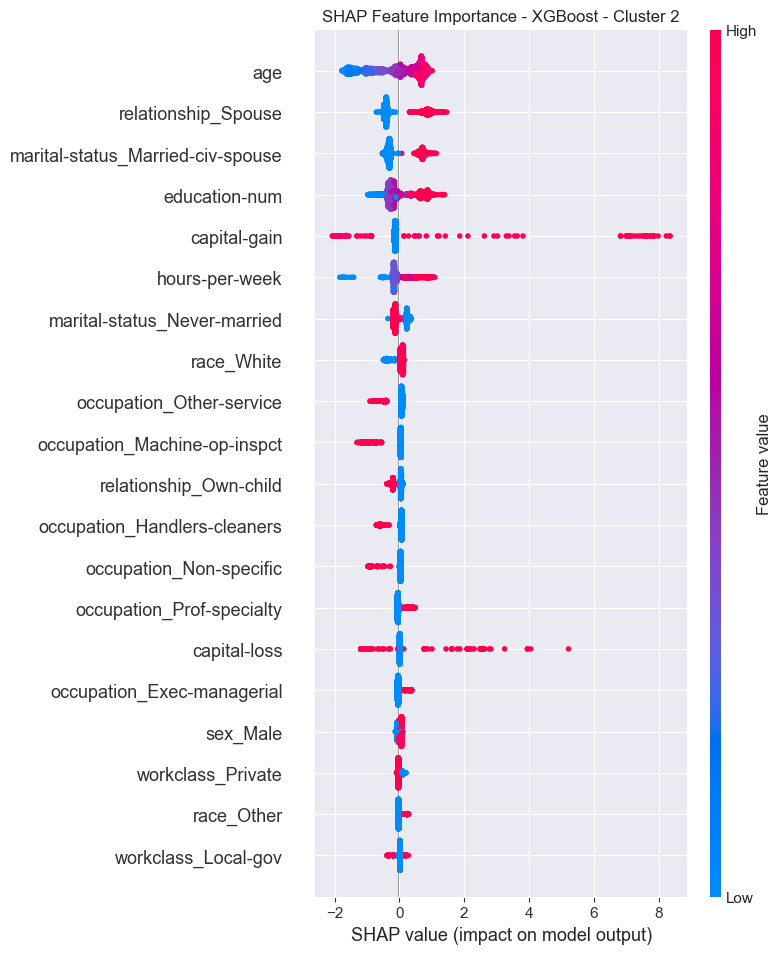

Cluster 4
Running GridSearch for RandomForest...
RandomForest best params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 500}
RandomForest accuracy: 0.7725
----------------------------------------
Running GridSearch for XGBoost...


D:\UVG\NLP\text-normalization\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [00:48:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost best params: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
XGBoost accuracy: 0.7814
----------------------------------------
Running GridSearch for SVM...
SVM best params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
SVM accuracy: 0.7392
----------------------------------------

Best model for this cluster:
Model: XGBoost
Accuracy: 0.7814
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       520
           1       0.79      0.66      0.72       381

    accuracy                           0.78       901
   macro avg       0.78      0.77      0.77       901
weighted avg       0.78      0.78      0.78       901

Confusion Matrix:
[[452  68]
 [129 252]]




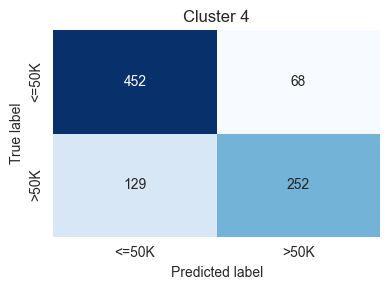

Computing SHAP values for XGBoost...


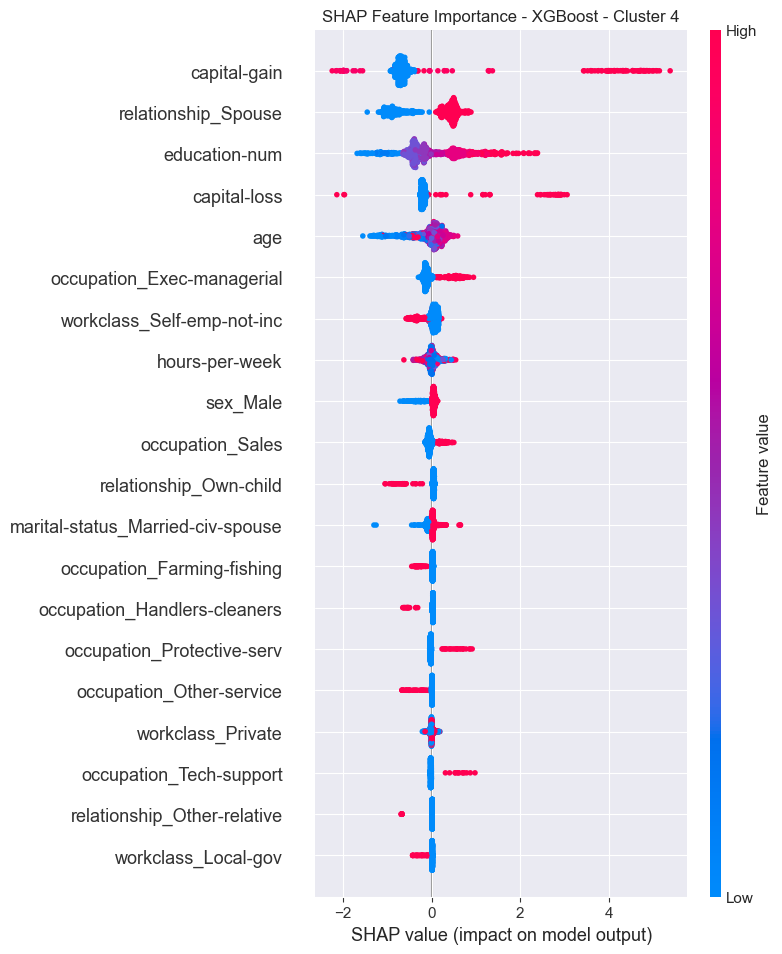

Cluster 5
Running GridSearch for RandomForest...
RandomForest best params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 500}
RandomForest accuracy: 0.9779
----------------------------------------
Running GridSearch for XGBoost...


D:\UVG\NLP\text-normalization\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [00:51:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost best params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
XGBoost accuracy: 0.9809
----------------------------------------
Running GridSearch for SVM...
SVM best params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
SVM accuracy: 0.9729
----------------------------------------

Best model for this cluster:
Model: XGBoost
Accuracy: 0.9809
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       967
           1       0.76      0.46      0.58        28

    accuracy                           0.98       995
   macro avg       0.87      0.73      0.78       995
weighted avg       0.98      0.98      0.98       995

Confusion Matrix:
[[963   4]
 [ 15  13]]




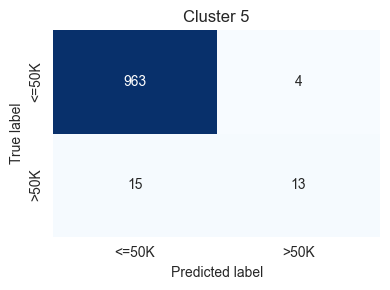

Computing SHAP values for XGBoost...


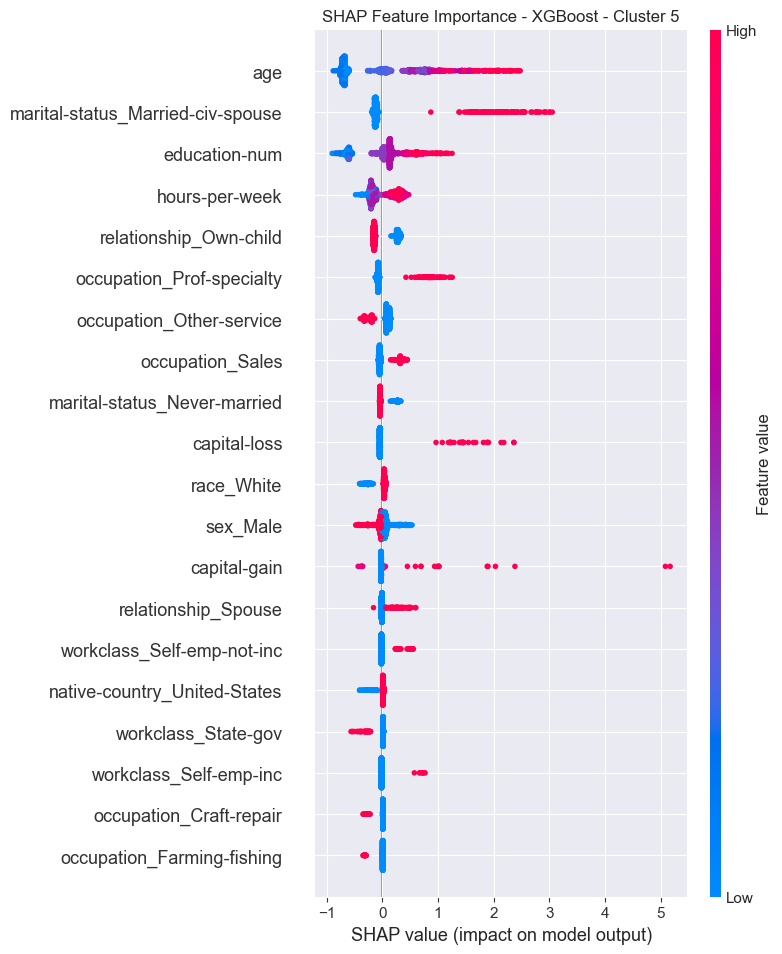

In [18]:
for cluster in clusters:
    print("="*60)
    print(f"Cluster {cluster}")
    print("="*60)

    # Filter data for the cluster
    X_cluster = X[df["cluster"] == cluster]
    y_cluster = y[df["cluster"] == cluster]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_cluster, y_cluster, test_size=0.2, random_state=42, stratify=y_cluster
    )

    best_model = None
    best_score = 0
    best_name = None

    # Grid search for each model
    for name, (model, param_grid) in models_and_params.items():
        print(f"Running GridSearch for {name}...")
        grid = GridSearchCV(model, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
        grid.fit(X_train, y_train)

        y_pred = grid.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        print(f"{name} best params: {grid.best_params_}")
        print(f"{name} accuracy: {acc:.4f}")

        if acc > best_score:
            best_score = acc
            best_model = grid.best_estimator_
            best_name = name
            y_pred_best = y_pred

        print("-"*40)

    # Final report for the best model in this cluster
    print("\nBest model for this cluster:")
    print(f"Model: {best_name}")
    print(f"Accuracy: {best_score:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_best))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_best))
    print("\n")
    plot_confusion_matrix(confusion_matrix(y_test, y_pred_best), f'Cluster {cluster}')

    confusion_matrix_total += confusion_matrix(y_test, y_pred_best)

    print(f"Computing SHAP values for {best_name}...")
    try:
        if best_name == "RandomForest":
            explainer = shap.TreeExplainer(best_model, X_train)
            shap_values = explainer.shap_values(X_test)
            shap.summary_plot(shap_values[1], X_test, show=False)
            plt.title(f"SHAP Feature Importance - RandomForest - Cluster {cluster}")
            plt.show()
        elif best_name == "XGBoost":
            explainer = shap.TreeExplainer(best_model, X_train)
            shap_values = explainer.shap_values(X_test)
            shap.summary_plot(shap_values, X_test, show=False)
            plt.title(f"SHAP Feature Importance - XGBoost - Cluster {cluster}")
            plt.show()
        elif best_name == "SVM":
            background = shap.sample(X_train, 100, random_state=21562)
            explainer = shap.KernelExplainer(best_model.predict_proba, background)
            shap_values = explainer.shap_values(X_test, nsamples=100)
            shap.summary_plot(shap_values[1], X_test, show=False)
            plt.title(f"SHAP Feature Importance - SVM - Cluster {cluster}")
            plt.show()
    except Exception as e:
        print(f"SHAP explanation failed: {e}")


    # Save the models and the results
    model_path = f"../models/best_model_cluster_{cluster}_{best_name}.joblib"
    joblib.dump(best_model, model_path)
    results = {
        "cluster": int(cluster),
        "model": best_name,
        "accuracy": float(best_score),
        "best_params": grid.best_params_,
        "classification_report": classification_report(y_test, y_pred_best, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred_best).tolist()
    }
    with open(f"../models/results_cluster_{cluster}_{best_name}.json", "w") as f:
        json.dump(results, f, indent=2)

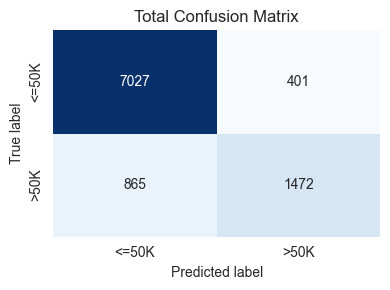

In [19]:
plot_confusion_matrix(confusion_matrix_total, 'Total Confusion Matrix')

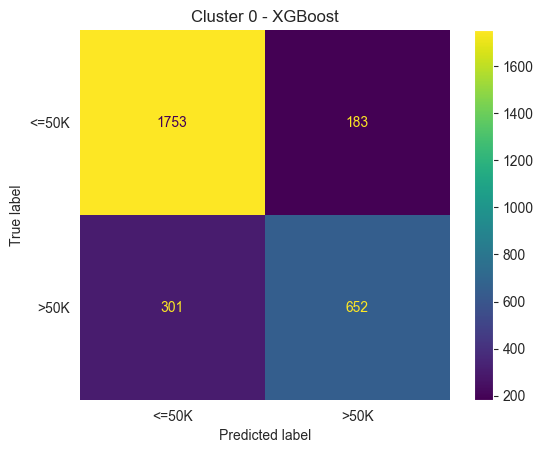

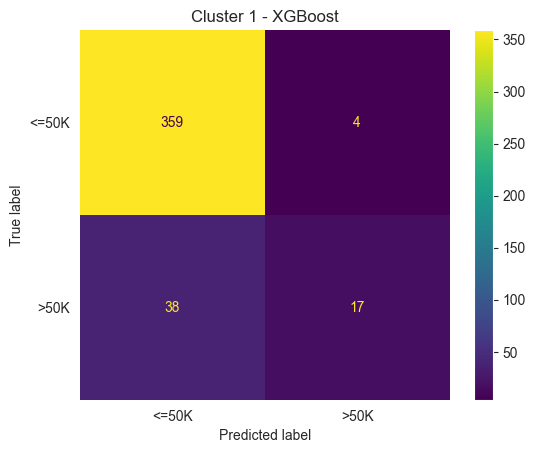

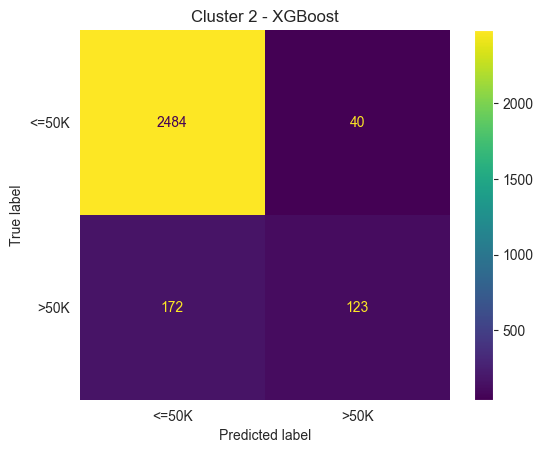

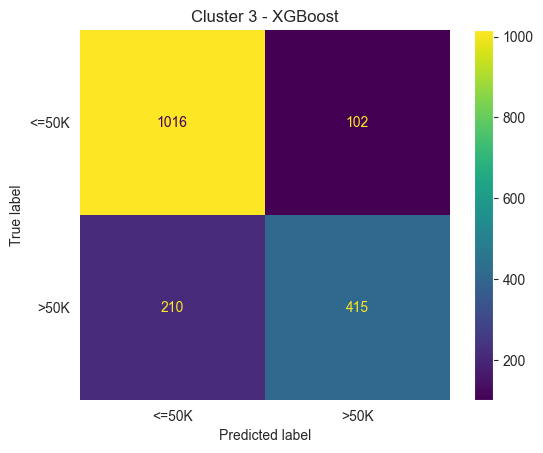

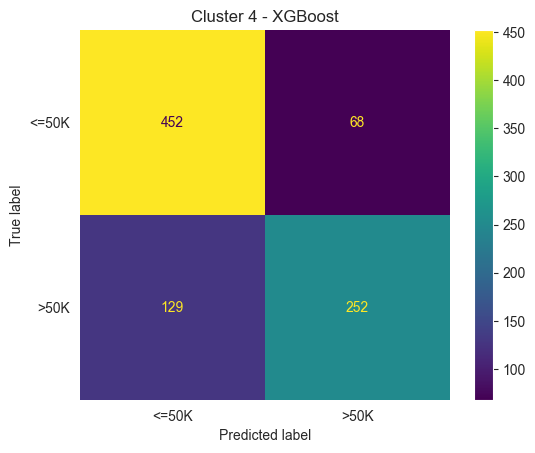

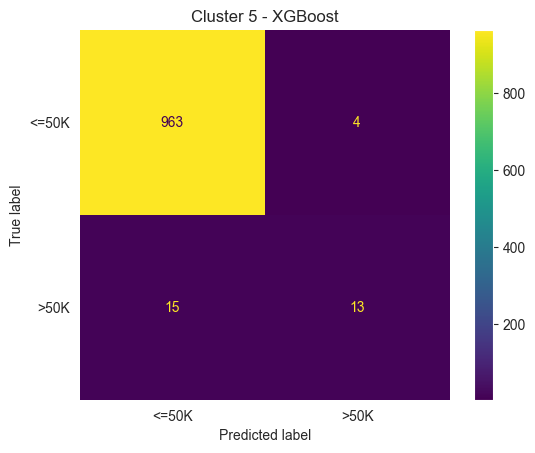

In [29]:
# Read all the results json and print the confussion matrixs with ConfusionMatrixDisplay
import os
from sklearn.metrics import ConfusionMatrixDisplay
results_files = [f for f in os.listdir("../models") if f.startswith("results_cluster_") and f.endswith(".json")]

for file in results_files:
    with open(os.path.join("../models", file), "r") as f:
        results = json.load(f)
        cm = np.array(results["confusion_matrix"])
        disp = ConfusionMatrixDisplay(cm, display_labels=['<=50K', '>50K'])
        disp.plot()

        # remove the cross/grid
        plt.grid(False)
        plt.gca().spines[:].set_visible(False)  # hide frame if you want

        plt.title(f"Cluster {results['cluster']} - {results['model']}")
        plt.show()